In [3]:

!pip install -q kaggle


In [4]:

from google.colab import files
uploaded = files.upload()


!mkdir -p /root/.kaggle
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!ls -la /root/.kaggle


Saving kaggle.json to kaggle.json
total 16
drwxr-xr-x 2 root root 4096 Sep 19 16:04 .
drwx------ 1 root root 4096 Sep 19 16:04 ..
-rw------- 1 root root   63 Sep 19 16:04 kaggle.json


In [8]:
from google.colab import drive
drive.mount('/content/drive')


!mkdir -p /root/.kaggle
!cp /content/drive/MyDrive/kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!ls -la /root/.kaggle


Mounted at /content/drive
cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory
total 16
drwxr-xr-x 2 root root 4096 Sep 19 16:04 .
drwx------ 1 root root 4096 Sep 19 16:04 ..
-rw------- 1 root root   63 Sep 19 16:04 kaggle.json


In [9]:

!kaggle datasets list -s "face mask" --page 1


ref                                                              title                                                      size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
andrewmvd/face-mask-detection                                    Face Mask Detection                                   416968083  2020-05-22 07:18:42.220000         102270       1897  0.875            
vijaykumar1799/face-mask-detection                               Face Mask Detection                                   232816416  2021-05-19 15:24:14.857000           8506         89  0.875            
prasoonkottarathil/face-mask-lite-dataset                        Face Mask Lite Dataset                              25002249935  2020-07-12 05:14:16.797000          13368        173  0.875   

In [10]:

!kaggle datasets download -d omkargurav/face-mask-dataset -p /content --unzip


Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 76% 124M/163M [00:00<00:00, 627MB/s] 
100% 163M/163M [00:00<00:00, 572MB/s]


In [12]:
import os
print(os.listdir('/content/data'))


['without_mask', 'with_mask']


In [14]:
!pip install split-folders


In [15]:
import splitfolders

input_folder = '/content/data'
output_folder = '/content/face_mask_data'


splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.7, 0.2, 0.1))


Copying files: 7553 files [00:04, 1754.61 files/s]


In [16]:
import os

print(os.listdir('/content'))
print(os.listdir('/content/face_mask_data'))


['.config', 'data', 'face_mask_data', 'kaggle.json', 'drive', 'sample_data']
['train', 'val', 'test']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 128
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/face_mask_data/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    '/content/face_mask_data/val',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    '/content/face_mask_data/test',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)


Found 5286 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.
Found 757 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Epoch 1/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.8088 - loss: 0.4436 - val_accuracy: 0.8881 - val_loss: 0.2828
Epoch 2/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.8308 - loss: 0.4031 - val_accuracy: 0.8841 - val_loss: 0.2813
Epoch 3/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.8556 - loss: 0.3571 - val_accuracy: 0.8742 - val_loss: 0.2884
Epoch 4/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.8543 - loss: 0.3456 - val_accuracy: 0.9073 - val_loss: 0.2291
Epoch 5/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.8565 - loss: 0.3393 - val_accuracy: 0.8907 - val_loss: 0.2484
Epoch 6/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.8651 - loss: 0.3347 - val_accuracy: 0.9079 - val_loss: 0.2266
Epoch 7/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.8586 - loss: 0.3376 - val_accuracy: 0.9139 - val_loss: 0.2119
Epoch 8/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.8765 - loss: 0.2947 - val_accu

In [ ]:
loss, acc = model.evaluate(test_generator)
print("✅ Test Accuracy:", acc)


24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 247ms/step - accuracy: 0.9601 - loss: 0.1083
✅ Test Accuracy: 0.9260237812995911


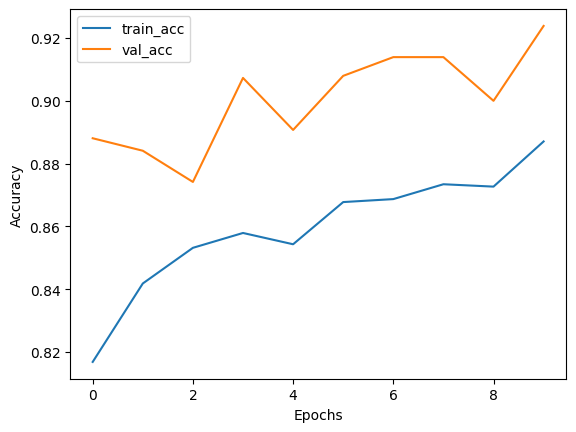

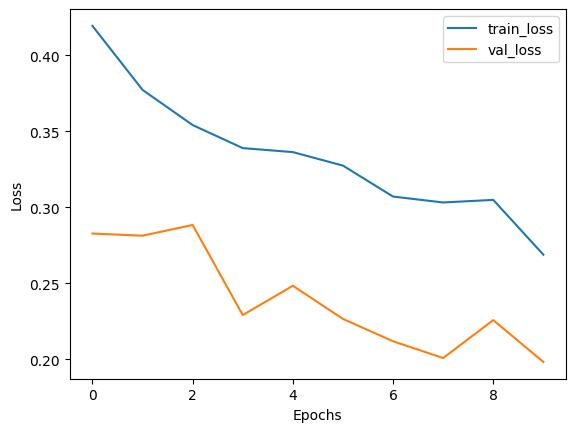

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


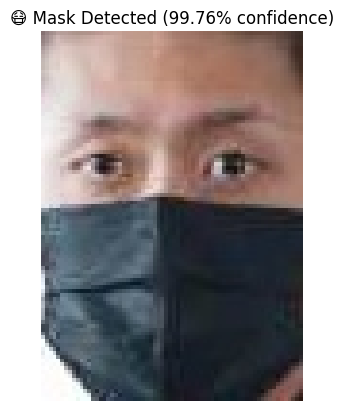

Image path: /content/face_mask_data/test/with_mask/with_mask_1040.jpg
Prediction: 😷 Mask Detected (99.76% confidence)


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

IMG_SIZE = 128
img_path ='/content/face_mask_data/test/with_mask/with_mask_1040.jpg'
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt




img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_array)[0][0]

if prediction < 0.5:
    label = "😷 Mask Detected"
    confidence = (1 - prediction) * 100
else:
    label = "❌ No Mask Detected"
    confidence = prediction * 100


plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.title(f"{label} ({confidence:.2f}% confidence)")
plt.show()


print(f"Image path: {img_path}")
print(f"Prediction: {label} ({confidence:.2f}% confidence)")






In [ ]:
from google.colab import files
uploaded = files.upload()  


Saving test5.jpg to test5.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


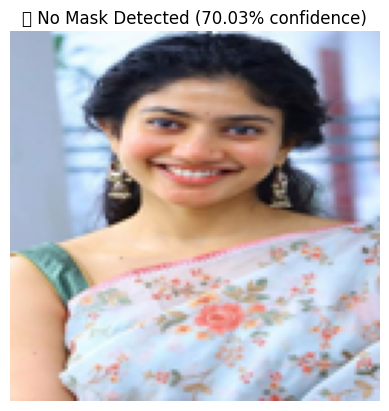

Image path: /content/test4.jpg
Prediction: ❌ No Mask Detected (70.03% confidence)


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

IMG_SIZE = 128


img_path = '/content/test4.jpg'

img = Image.open(img_path).convert('RGB')


img = img.resize((IMG_SIZE, IMG_SIZE))

img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)


prediction = model.predict(img_array)[0][0]

if prediction < 0.5:
    label = "😷 Mask Detected"
    confidence = (1 - prediction) * 100
else:
    label = "❌ No Mask Detected"
    confidence = prediction * 100


plt.imshow(img)
plt.axis('off')
plt.title(f"{label} ({confidence:.2f}% confidence)")
plt.show()

print(f"Image path: {img_path}")
print(f"Prediction: {label} ({confidence:.2f}% confidence)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


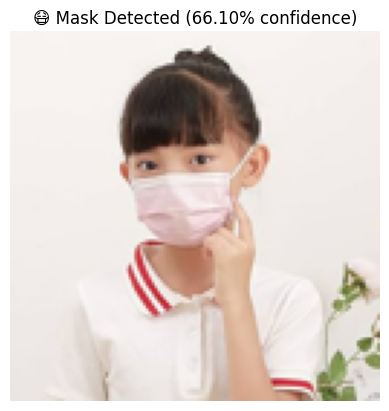

Image path: /content/test6.jpg
Prediction: 😷 Mask Detected (66.10% confidence)


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

IMG_SIZE = 128
img_path = '/content/test6.jpg'


img = Image.open(img_path).convert('RGB')

img = img.resize((IMG_SIZE, IMG_SIZE))


img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)


prediction = model.predict(img_array)[0][0]

if prediction < 0.5:
    label = "😷 Mask Detected"
    confidence = (1 - prediction) * 100
else:
    label = "❌ No Mask Detected"
    confidence = prediction * 100


plt.imshow(img)
plt.axis('off')
plt.title(f"{label} ({confidence:.2f}% confidence)")
plt.show()

print(f"Image path: {img_path}")
print(f"Prediction: {label} ({confidence:.2f}% confidence)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


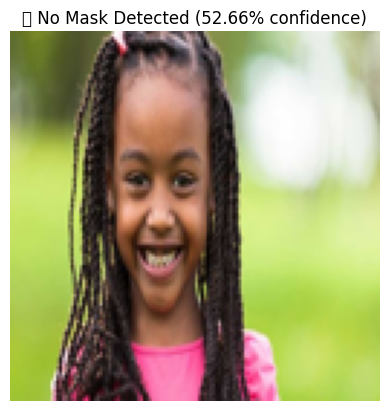

Image path: /content/test2.jpg
Prediction: ❌ No Mask Detected (52.66% confidence)


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

IMG_SIZE = 128

img_path = '/content/test2.jpg'


img = Image.open(img_path).convert('RGB')


img = img.resize((IMG_SIZE, IMG_SIZE))


img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)


prediction = model.predict(img_array)[0][0]

if prediction < 0.5:
    label = "😷 Mask Detected"
    confidence = (1 - prediction) * 100
else:
    label = "❌ No Mask Detected"
    confidence = prediction * 100

plt.imshow(img)
plt.axis('off')
plt.title(f"{label} ({confidence:.2f}% confidence)")
plt.show()

print(f"Image path: {img_path}")
print(f"Prediction: {label} ({confidence:.2f}% confidence)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


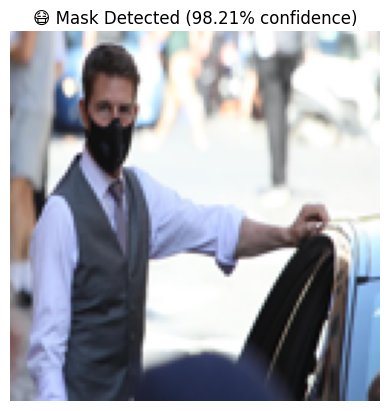

Image path: /content/test5.jpg
Prediction: 😷 Mask Detected (98.21% confidence)


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

IMG_SIZE = 128

img_path = '/content/test5.jpg'

img = Image.open(img_path).convert('RGB')


img = img.resize((IMG_SIZE, IMG_SIZE))


img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)[0][0]

if prediction < 0.5:
    label = "😷 Mask Detected"
    confidence = (1 - prediction) * 100
else:
    label = "❌ No Mask Detected"
    confidence = prediction * 100

plt.imshow(img)
plt.axis('off')
plt.title(f"{label} ({confidence:.2f}% confidence)")
plt.show()

print(f"Image path: {img_path}")
print(f"Prediction: {label} ({confidence:.2f}% confidence)")